# SANKALP JAIN

In this task, we will perform Exploratory Data Analysis(EDA) on the SampleSuperstore Dataset through which we will try to figure out what are the problems related to the business aspect. We will find out the weak areas where the organisation needs to improve in order to make more profit

**Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


**Importing dataset**

In [2]:
df=pd.read_csv('SampleSuperstore.csv')
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


# Performing EDA (Exploratory Data Analysis)

**Checking for any missing values**

In [3]:
df.isna().sum() #Returns the no of missing values in each column of the dataset

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

We can see, that we don't have any missing values in the dataset 

**Getting a quick overview of our dataset**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


**Checking for any duplicate values**

In [6]:
df.duplicated().sum()

17

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(9977, 13)

**Looking for distinct values in each categorical column**

Text(0, 0.5, 'Frequency')

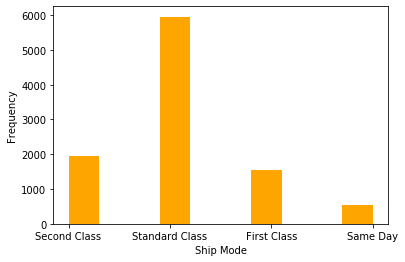

In [9]:
plt.hist(df['Ship Mode'],color='orange')
plt.xlabel('Ship Mode')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

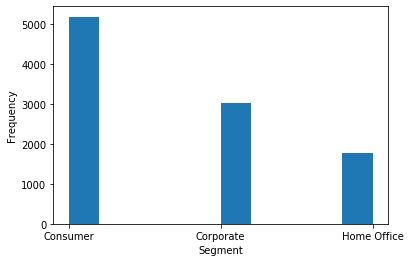

In [10]:
plt.hist(df['Segment'])
plt.xlabel('Segment')
plt.ylabel('Frequency')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

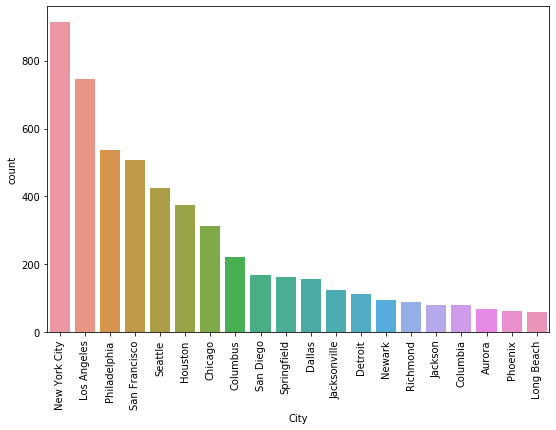

In [36]:
plt.figure(figsize=(9,6))
sns.countplot(x=df['City'],order=(df['City'].value_counts().head(20)).index)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text xticklabel objects>)

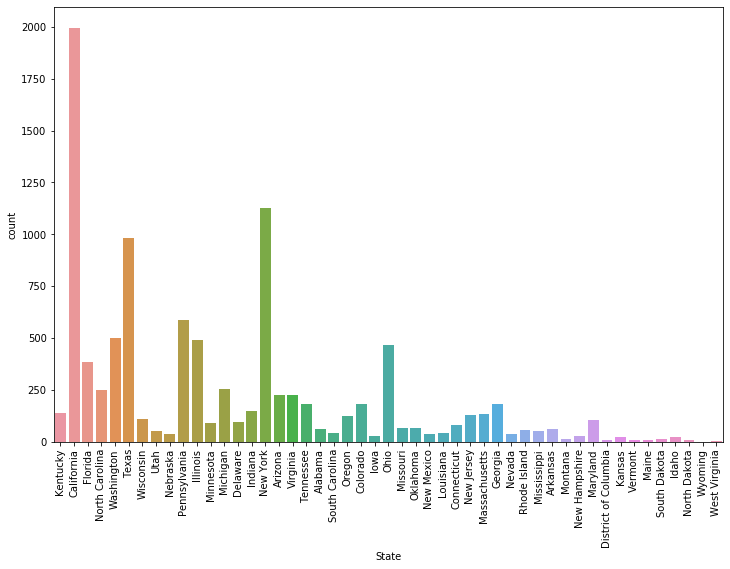

In [24]:
plt.figure(figsize=(12,8))
sns.countplot(x=df['State'])
plt.xticks(rotation=90)

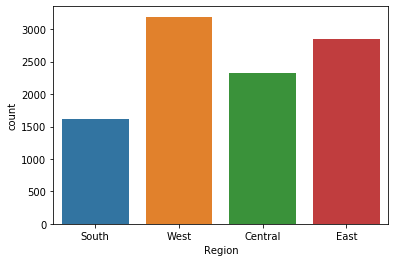

In [23]:
sns.countplot(x=df['Region'])

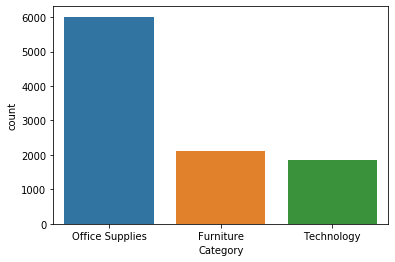

In [27]:
sns.countplot(x=df['Category'],order=(df['Category'].value_counts()).index)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

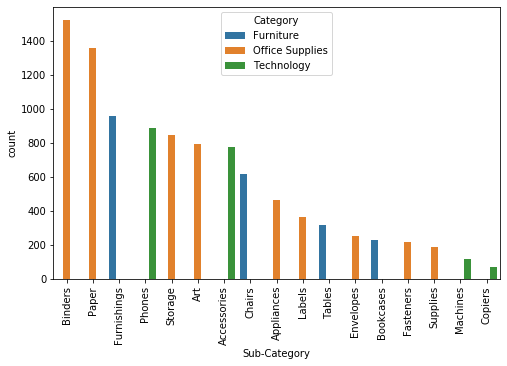

In [32]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Sub-Category'],order=(df['Sub-Category'].value_counts()).index,hue=df['Category'])
plt.xticks(rotation=90)

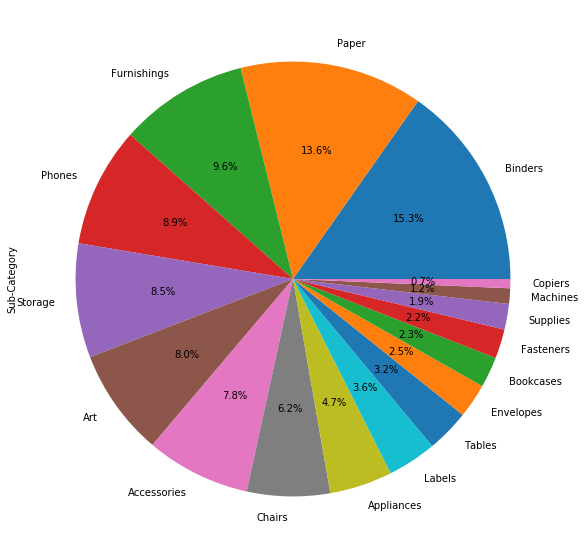

In [40]:
plt.figure(figsize=(13,10))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

**Removing unnecessary columns**

**Country** column is not required since all the dataset is from **United States** country, so it does not give us any concrete information. Also, **Postal Code** column is not required.

In [38]:
df.drop(columns=['Country','Postal Code'],inplace=True)
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 11 columns):
Ship Mode       9977 non-null object
Segment         9977 non-null object
City            9977 non-null object
State           9977 non-null object
Region          9977 non-null object
Category        9977 non-null object
Sub-Category    9977 non-null object
Sales           9977 non-null float64
Quantity        9977 non-null int64
Discount        9977 non-null float64
Profit          9977 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 1.2+ MB


**Analysing Sales and profit across different ship mode**

Text(0, 0.5, 'Sales and Profit')

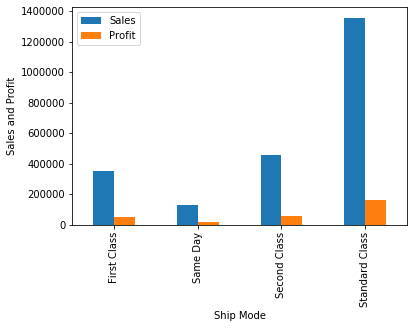

In [47]:
df.groupby('Ship Mode')[['Sales','Profit']].sum().plot.bar()
plt.ylabel('Sales and Profit')

We can see that the **Standard Class** Ship Mode made the highest sales and profit followed by **Second Class**,**First Class** and **Same Day** 

**Analysing Sales and profit across different segments**

Text(0, 0.5, 'Sales and Profit')

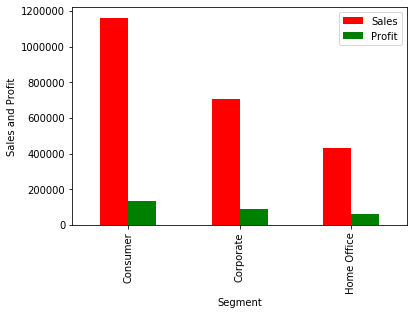

In [70]:
df.groupby('Segment')[['Sales','Profit']].sum().plot.bar(color=['red','green'])
plt.ylabel('Sales and Profit')

**Consumer** made the highest sales and profit followed by **Corporate**,**Home Office**

**Analysing sales and profit across different states**

Text(0, 0.5, 'Sales and Profit')

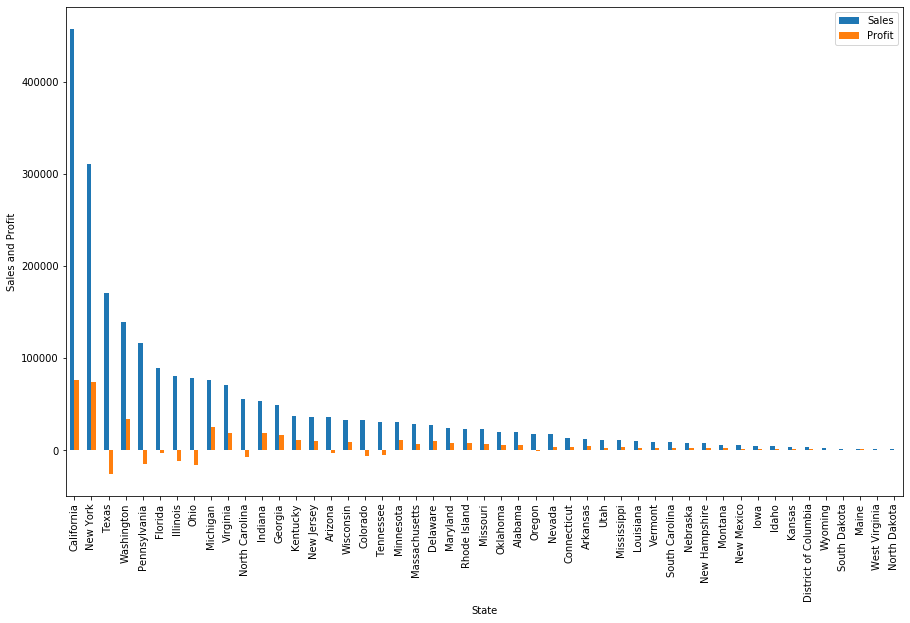

In [60]:
df.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False).plot.bar(figsize=(15,9))
plt.ylabel('Sales and Profit')

**California**, **New York** and **Washington** are the top three states in terms of Profit earned whereas states like **Texas**,**Pennysylvania**,**Florida**,**Illinois**,**Ohio**,etc were in loss despite the high amount of sales in those states. 
Something is definitely going wrong in those latter mentioned states and they need to figure that out as earliest as possible. If the problem persists, then decrease the no of sales in those countries and increase the sales in countries like California, New York,etc.

**Analysing Sales and Profit across different regions**

Text(0, 0.5, 'Sales and Profit')

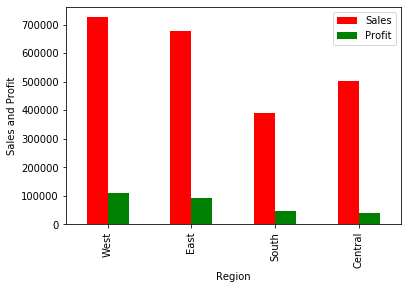

In [71]:
df.groupby('Region')[['Sales','Profit']].sum().sort_values(by='Profit',ascending=False).plot.bar(color=['red','green'])
plt.ylabel('Sales and Profit')

The **South** region made **more profit** than the **Central** region despite of the fact that it has comparatively **less sales** than in the Central region. 

**Analysing Sales and Profit across different Categories.**

Text(0, 0.5, 'Sales and Profit')

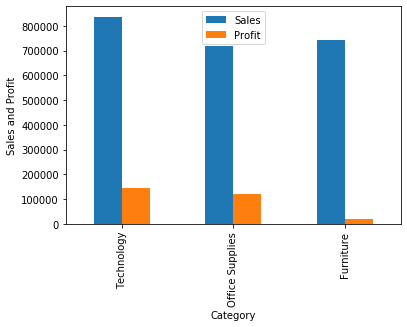

In [64]:
df.groupby('Category')[['Sales','Profit']].sum().sort_values(by='Profit',ascending=False).plot.bar()
plt.ylabel('Sales and Profit')

**Technology** made the highest Sales and Profit followed by **Office Supplies** and **Furniture**

**Analysing Different Sales and Profit across different Sub-Categories**

Text(0, 0.5, 'Sales and Profit')

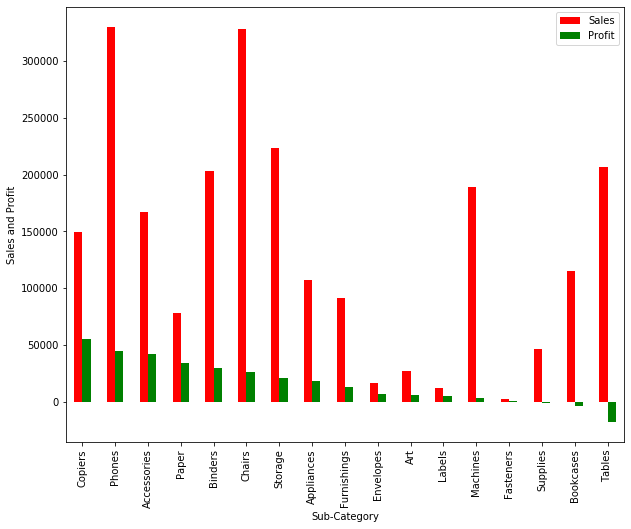

In [73]:
df.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Profit',ascending=False).plot.bar(color=['red','green'],figsize=(10,8))
plt.ylabel('Sales and Profit')

**Copiers**,**Accessories**,**Paper** and **Binders** performed exceptionally well as their Profit/Sales values are the highest among others.Whereas,**Tables**,**Bookcases**,and **Supplies** performed terribly as they showed the maximum loss despite having such good number of Sales.
Efforts should be made to increase the no of sales of Copiers,Accessories,Paper,etc and decrease the no of sales of Tables,Bookcases and Supplies.

**Analysing relationship between Sales and Profit**

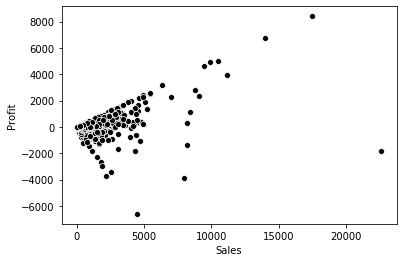

In [75]:
sns.scatterplot(x=df['Sales'],y=df['Profit'],color='black')

This scatterplot clearly shows that there is no relationship between **Sales** and **Profit**

**Analysing relationship between Discount and Profit**

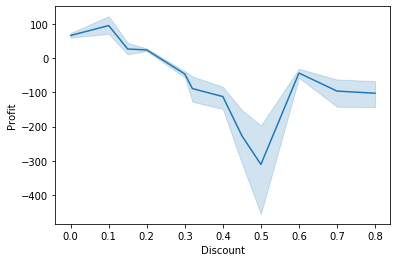

In [69]:
sns.lineplot(x=df['Discount'],y=df['Profit'])

Profit only occurred when the discount was less than **15 percent**(.15).